In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [4]:
# loading our dataframes
#we will be using df_m for our sample of math class students and df_p for our sample of portugees class. 

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [5]:
sum_grades_m = df_m['G1'] + df_m['G2'] + df_m['G3']
print("Cummulative grades for Math class studetns:", sum_grades_m) 
print(" ")
sum_grades_p = df_p['G1'] + df_p['G2'] + df_p['G3']
print("Cummulative grades for Port class studetns:", sum_grades_p) 

Cummulative grades for Math class studetns: 0      17
1      16
2      25
3      44
4      26
       ..
390    27
391    46
392    25
393    33
394    26
Length: 395, dtype: int64
 
Cummulative grades for Port class studetns: 0      22
1      31
2      37
3      42
4      37
       ..
644    31
645    46
646    32
647    30
648    32
Length: 649, dtype: int64


<Axes: xlabel='schoolsup', ylabel='G3'>

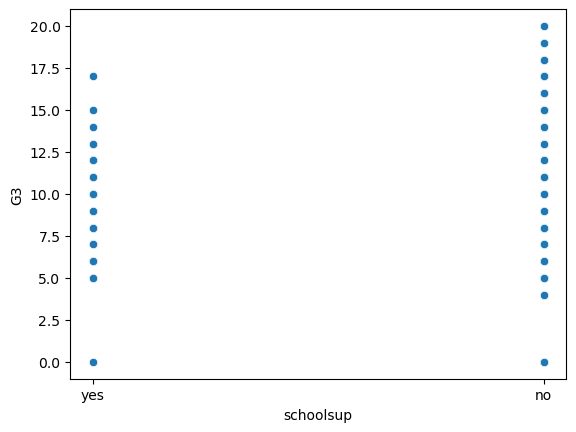

In [6]:
#Checked for outliers for G3, found one that was 0
sns.scatterplot (data=df_m, x=df_m["schoolsup"], y=df_m['G3'])

In [9]:
# dropped outliers
df_m_drop_val = df_m.drop(df_m[(df_m['G3'] == 0) & (df_m['schoolsup'] == 0)].index)

In [10]:
# dropped outliers
df_p_drop_val = df_p.drop(df_p[(df_p['G3'] == 0) & (df_p['schoolsup'] == 0)].index)

In [13]:
# converting binary variable and nominal into dummy variables
# including "drop_first=True" is used to avoid multicollinearity
df_m_bool = pd.get_dummies(df_m_drop_val, drop_first=True)
df_m_bool

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


In [14]:
# converting binary variable and nominal into dummy variables
# including "drop_first=True" is used to avoid multicollinearity
df_p_bool = pd.get_dummies(df_p_drop_val, drop_first=True)
df_p_bool

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False


In [15]:
#convert bools into 0s and 1s
math_converted = df_m_bool.astype(int)
math_converted

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [16]:
#convert bools into 0s and 1s
math_converted = df_p_bool.astype(int)
math_converted

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


In [19]:
math_converted.to_csv("../data/student-merge.R", index=False)